In [178]:
# IMPORT ALL DEPENDENCIES

import os
import cv2 as cv
#import matplotlib as mtplt
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image
import numpy as np


In [179]:
# DECLARING ALL PATHS AND VARIABLES.

DATA_DIR = "\\".join(os.getcwd().split("\\")[:-1]) + "\\" + "DataSet"
ANNOTATIONS_DIR = DATA_DIR + "\\" + "Annotations\\"
IMG_DIR = DATA_DIR + "\\" + "Images\\"
PROCESSESED_PATH = DATA_DIR + '\\' + 'ProcessedDatasets\\'
AVAILABLE_CLASSES = ['n02089078-black-and-tan_coonhound','n02091831-Saluki','n02092002-Scottish_deerhound','n02095314-wire-haired_fox_terrier']


CLASS_NAMES = []
CLASS_CODES = []
ANNOTATION_PATHS = []
IMAGE_PATHS = []
PROCESSED_IMAGE_PATHS = []


for i in range(4):
    CLASS_NAMES.append("-".join(AVAILABLE_CLASSES[i].split("-")[1:]))
    CLASS_CODES.append(AVAILABLE_CLASSES[i].split("-")[0])
    ANNOTATION_PATHS.append(ANNOTATIONS_DIR + AVAILABLE_CLASSES[i] + "\\" )
    IMAGE_PATHS.append(IMG_DIR + AVAILABLE_CLASSES[i] + "\\")
    PROCESSED_IMAGE_PATHS.append(PROCESSESED_PATH + CLASS_CODES[i]+"-" +CLASS_NAMES[i]+ "\\")

print(IMAGE_PATHS)


['c:\\Users\\yagna\\Documents\\Data-Mining-1\\DataSet\\Images\\n02089078-black-and-tan_coonhound\\', 'c:\\Users\\yagna\\Documents\\Data-Mining-1\\DataSet\\Images\\n02091831-Saluki\\', 'c:\\Users\\yagna\\Documents\\Data-Mining-1\\DataSet\\Images\\n02092002-Scottish_deerhound\\', 'c:\\Users\\yagna\\Documents\\Data-Mining-1\\DataSet\\Images\\n02095314-wire-haired_fox_terrier\\']


In [190]:
# FUNCTION TO PROCESS THE IMAGE BASED ON THE CORRESPONDING ANNOTATIONS.

def get_bounding_boxes(annot):
  xml = annot
  tree = ET.parse(xml)
  root = tree.getroot()
  objects = root.findall('object')
  bbox = []
  for o in objects:
    bndbox = o.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    bbox.append((xmin,ymin,xmax,ymax))
  return bbox

#FUNCTION TO CROP EVERY IMAGE IN EVERY CLASS AND SAVE IN A PROCESSED DIRECTORY.

def crop_image(image_path , annotation_path,save_path):
  img = cv.imread(image_path)
  bb = get_bounding_boxes(annotation_path)
  bbox = bb[0]
  cropped_data = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
  crop_img = Image.fromarray(cropped_data,'RGB')
  print(crop_img.size)
  crop_img.resize((331,331))
  print(crop_img.size)
  crop_img.convert('RGB')
  crop_img.save(save_path)
  


  

In [191]:


for i in range(4):
    for dog in os.listdir(IMAGE_PATHS[i]):
        image_path = dog
        annotation_path = dog.split(".")[0]
        if not os.path.exists(PROCESSED_IMAGE_PATHS[i]):
            os.mkdir(PROCESSED_IMAGE_PATHS[i])
        crop_image(IMAGE_PATHS[i]+  image_path, ANNOTATION_PATHS[i] + annotation_path, PROCESSED_IMAGE_PATHS[i] + dog)
        break
    break



(215, 328)
(215, 328)


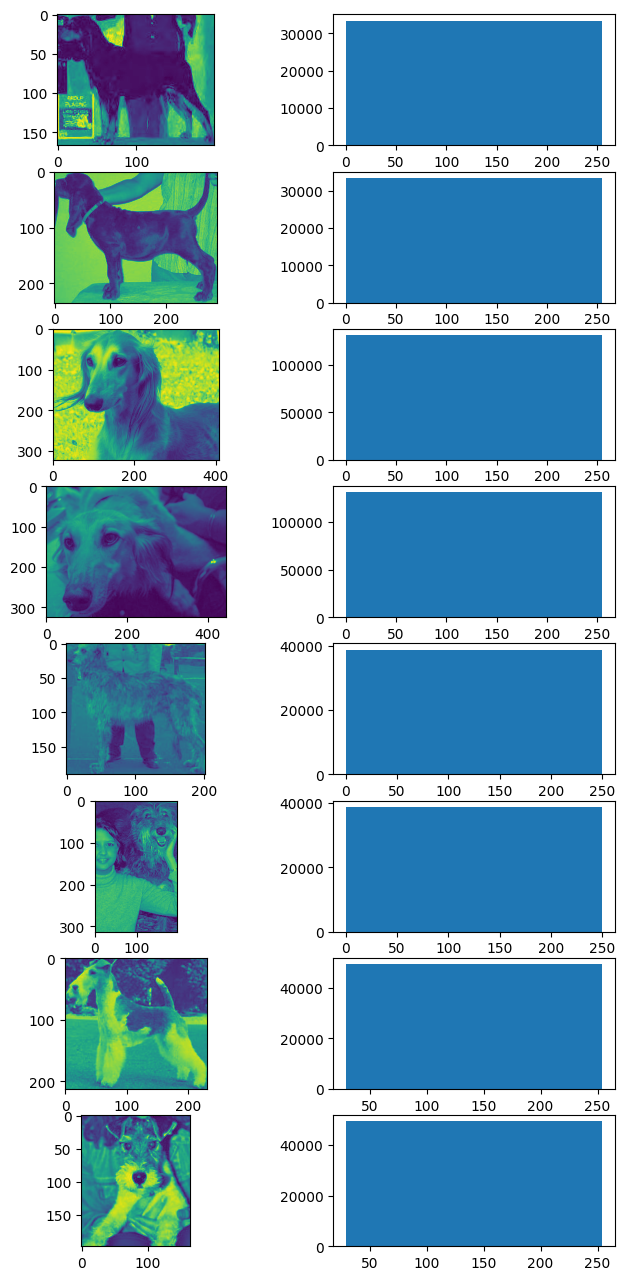

In [189]:
import cv2 as cv
import os

fig = plt.figure(figsize=(8, 16))

rows = 8
columns = 2

for i in range(4):

    img1 = cv.imread(PROCESSED_IMAGE_PATHS[i] +  os.listdir(PROCESSED_IMAGE_PATHS[i])[4] )
    img2 = cv.imread(PROCESSED_IMAGE_PATHS[i] +  os.listdir(PROCESSED_IMAGE_PATHS[i])[6] )
    img1_gray = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
    img2_gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

    fig.add_subplot(rows,columns,4*i+1)
    plt.imshow(img1_gray)

    
    fig.add_subplot(rows,columns,2*(2*i+1))
    hist_1 =img1_gray.flatten()
    plt.hist(hist_1,bins=1)

    fig.add_subplot(rows,columns,4*(i+1))
    hist_2 =img1_gray.flatten()
    plt.hist(hist_2,bins=1)


    fig.add_subplot(rows,columns,4*i+3)
    plt.imshow(img2_gray)
    

